<center> <h1>Assignment #1</h1> </center>
<center> <h2>DSP</h2> </center>


| Name | Section | B.N. |
|: ----------- | :--- | :--- |
| Ahmed Abdelsalam AbdelKhalek | 1 | 16 |
| Omar Magdy Mohammed Ahmed | 3 | 10 |
| Amr Adel Ahmed Okasha | 3 | 13 |


## Tabel Of Content
### 1. Linear Regression Problem
     1.1 Models to Describe the Problem
     1.2 Weights and intercepts Values
     1.3 Finding Score With this Equation
     1.4 Plotting the chosen model
### 2. Non-Linear Regression Problem
     2.1 Models to Describe the Problem
     2.2 Weights and intercepts Values
     2.3 Finding Score With this Equation
     2.4 Plotting the chosen model
### 3. Quadratic Regression Problem
     3.1 Models to Describe the Problem
     3.2 Weights and intercepts Values
     3.3 Finding Score With this Equation
     3.4 Plotting the chosen model
### 4. Logistic regression Problem
     4.1 Models to Describe the Problem
     4.2 Weights and intercepts Values
     4.3 Finding Score With this Equation
     4.4 Plotting the chosen model


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 18 21:10:13 2021

@author: Omar Khalil, Amr Okasha and Ahmed AbdelSalam
"""
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import os
import sys
import matplotlib.widgets as widgets
from matplotlib.widgets import Cursor
import mplcursors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_sparse_coded_signal
from sklearn import preprocessing
from scipy import signal
from IPython.display import Image
%matplotlib widget

ModuleNotFoundError: No module named 'mplcursors'

## 1. Linear Regression Problem
> Model to describe The numbers of insured persons *Y* with an insurance company for the years *X*

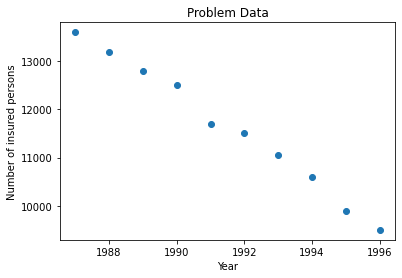

In [30]:
%matplotlib inline
#===============================
#storing and plotting data
#================================

Linear_Regression_Problems_x=np.asarray([1987,1988 ,1989 ,1990 ,1991, 1992, 1993 ,1994, 1995, 1996])
Linear_Regression_Problems_y=np.asarray([ 13600,13200, 12800, 12500, 11700, 11500, 11050, 10600, 9900, 9500])
X_seq = np.linspace(Linear_Regression_Problems_x.min(),2010,18).reshape(-1,1)

data_fig = plt.figure()
plt.scatter(Linear_Regression_Problems_x,Linear_Regression_Problems_y);
plt.title("Problem Data")

plt.xlabel("Year")
plt.ylabel("Number of insured persons");

### 1.1 Models to Describe the Problem
> Linear Model *Y =aX+intercept*

> Quadratic Model *Y=a$X^{2}$+bX+intercept*

> Cubic Model *Y=a$X^{3}$+b$X^{2}$+cX+intercept*

In [31]:
#===========================
#making models
#===========================
Linear_Regression_Problems_lreg = LinearRegression().fit(Linear_Regression_Problems_x.reshape(-1,1),
                                                         Linear_Regression_Problems_y)


qreg_degree=2
Linear_Regression_Problems_qreg=make_pipeline(PolynomialFeatures(qreg_degree),
                                              LinearRegression())
Linear_Regression_Problems_qreg.fit(Linear_Regression_Problems_x.reshape(-1,1),
                                    Linear_Regression_Problems_y)


creg_degree=3
Linear_Regression_Problems_creg=make_pipeline(PolynomialFeatures(creg_degree),
                                              LinearRegression())
Linear_Regression_Problems_creg.fit(Linear_Regression_Problems_x.reshape(-1,1),
                                    Linear_Regression_Problems_y);

### 1.2 Weights and intercepts Values

> Linear Model *Y =-457.87X+923500.6*

> Quadratic Model *Y= -7.765$X^{2}$+30470X-29873587*

> Cubic Model *Y=-3.2$X^{3}$+1914$X^{2}$-3797043X+2510953890*

In [32]:
#===========================
#evaluation modles wieghts
#===========================
lreg_intercept=Linear_Regression_Problems_lreg.intercept_
lreg_coef=Linear_Regression_Problems_lreg.coef_
qreg_intercept=Linear_Regression_Problems_qreg[1].intercept_
qreg_coef=Linear_Regression_Problems_qreg[1].coef_
creg_intercept=Linear_Regression_Problems_creg[1].intercept_
creg_coef=Linear_Regression_Problems_creg[1].coef_
print("Lreg Coef= ",lreg_coef)
print("Lreg intercept= ",lreg_intercept)
print("Qreg Coef= ",qreg_coef[1:])
print("Qreg intercept= ",qreg_intercept)
print("Creg Coef= ",creg_coef[1:])
print("Creg intercept= ",creg_intercept)

Lreg Coef=  [-457.87878788]
Lreg intercept=  923500.6060606061
Qreg Coef=  [ 3.04707197e+04 -7.76515152e+00]
Qreg intercept=  -29873587.286396004
Creg Coef=  [-3.79704397e+06  1.91416131e+03 -3.21688011e-01]
Creg intercept=  2510953890.1258936


### 1.3 Finding Score With this Equation
> ${R}^{2} = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}$  


> No real Need for using more than linear according to the score numbers.

In [33]:
#===========================
#evaluation modles scores
#===========================
lreg_score=Linear_Regression_Problems_lreg.score(Linear_Regression_Problems_x.reshape(-1,1), 
                                                 Linear_Regression_Problems_y)
qreg_score=Linear_Regression_Problems_qreg.score(Linear_Regression_Problems_x.reshape(-1,1), 
                                                 Linear_Regression_Problems_y)
creg_score=Linear_Regression_Problems_creg.score(Linear_Regression_Problems_x.reshape(-1,1),
                                                 Linear_Regression_Problems_y)
print("lreg score= ",lreg_score)
print("qreg score= ",qreg_score)
print("creg score= ",creg_score)

lreg score=  0.9928888053914963
qreg score=  0.9947163980615839
creg score=  0.994734612607573


> Predict with all models at years 2000 and 2005

In [34]:
#===========================
#Predictions
#===========================

print("linear model predict @ 2000 =",Linear_Regression_Problems_lreg.predict(np.array([2000]).reshape(-1,1)))
print("quad model predict @ 2000 =",Linear_Regression_Problems_qreg.predict(np.array([2000]).reshape(-1,1)))
print("cubic model predict @ 2000 =",Linear_Regression_Problems_creg.predict(np.array([2000]).reshape(-1,1)))

print("linear model predict @ 2005 =",Linear_Regression_Problems_lreg.predict(np.array([2005]).reshape(-1,1)))
print("quad model predict @ 2005 =",Linear_Regression_Problems_qreg.predict(np.array([2005]).reshape(-1,1)))
print("cubic model predict @ 2005 =",Linear_Regression_Problems_creg.predict(np.array([2005]).reshape(-1,1)))

linear model predict @ 2000 = [7743.03030303]
quad model predict @ 2000 = [7246.06060585]
cubic model predict @ 2000 = [7088.64737225]
linear model predict @ 2005 = [5453.63636364]
quad model predict @ 2005 = [4102.49999941]
cubic model predict @ 2005 = [3374.88795805]


### 1.4 Plotting the chosen model (Linear)

In [35]:
%matplotlib widget
#===========================
# Plotting
#===========================
fig = plt.figure()
ax = fig.subplots()

plt.scatter(Linear_Regression_Problems_x,Linear_Regression_Problems_y)

lines = ax.plot(X_seq,Linear_Regression_Problems_lreg.predict(X_seq),color="black")
ax.grid()
ax.set_title("Prediction Model")

ax.set_xlabel("Year")
ax.set_ylabel("Predicted Number of insured People");
mplcursors.cursor(lines, hover=False,multiple=True)
fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

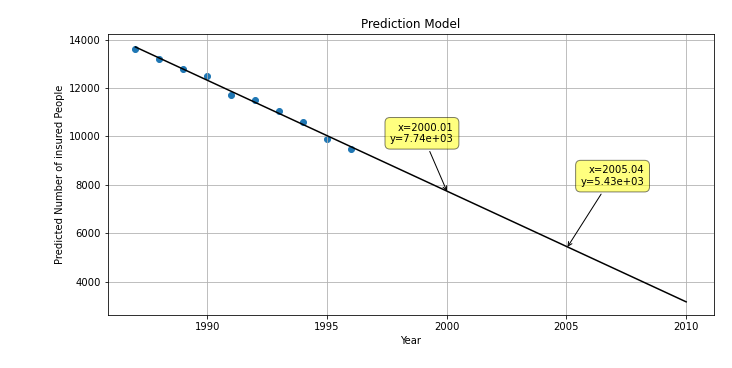

In [36]:
#### for PDF Conversion
Image("Fig1.png")

## 2. Non-Linear Regression Problem
> data on the waste generated in Florida *Y* given the Year *X*

In [1]:
%matplotlib inline
#===============================
#storing and plotting data
#================================


Non_Linear_Regression_Problems_x=np.asarray([1990 ,1991, 1992, 1993 ,1994])
Non_Linear_Regression_Problems_y=np.asarray([ 19300, 19500 , 20300,21500 , 23600])
X_seq = np.linspace(Non_Linear_Regression_Problems_x.min(),2006,17).reshape(-1,1)

avg=np.average(Non_Linear_Regression_Problems_y)
Non_Linear_Regression_Problems_x_logscale=np.log10(Non_Linear_Regression_Problems_x)
Non_Linear_Regression_Problems_y_logscale=np.log10(Non_Linear_Regression_Problems_y)

data_fig = plt.figure()
plt.scatter(Non_Linear_Regression_Problems_x,Non_Linear_Regression_Problems_y)
plt.title("Data plot")

plt.xlabel("Year")
plt.ylabel("Waste generated");

NameError: name 'np' is not defined

### 2.1 Models to Describe the Problem
> Linear Model *Y =aX+intercept*

> Quadratic Model *Y=a$X^{2}$+bX+intercept*

> Cubic Model *Y=a$X^{3}$+b$X^{2}$+cX+intercept*

>Power Model *Y=a($b^{X}$)*

In [38]:
#===========================
#making models
#===========================
Non_Linear_Regression_Problems_lreg = LinearRegression().fit(Non_Linear_Regression_Problems_x.reshape(-1,1),
                                                             Non_Linear_Regression_Problems_y)


qreg_degree=2
Non_Linear_Regression_Problems_qreg=make_pipeline(PolynomialFeatures(qreg_degree),LinearRegression())
Non_Linear_Regression_Problems_qreg.fit(Non_Linear_Regression_Problems_x.reshape(-1,1),
                                        Non_Linear_Regression_Problems_y)


creg_degree=3
Non_Linear_Regression_Problems_creg=make_pipeline(PolynomialFeatures(creg_degree),LinearRegression())
Non_Linear_Regression_Problems_creg.fit(Non_Linear_Regression_Problems_x.reshape(-1,1),
                                        Non_Linear_Regression_Problems_y)

#power function
Non_Linear_Regression_Problems_lreg_logscale = LinearRegression().fit(Non_Linear_Regression_Problems_x.reshape(-1,1), 
                                                                      Non_Linear_Regression_Problems_y_logscale)
Non_Linear_Regression_Problems_lreg_logscale2 = LinearRegression().fit(
                        Non_Linear_Regression_Problems_x_logscale.reshape(-1,1), 
                                                                       Non_Linear_Regression_Problems_y_logscale)

### 2.2 Weights and intercepts Values
> Linear Model *Y =1060X-2090680*

> Quadratic Model *Y=300$X^{2}$-1194140X+ 1188327920*

> Cubic Model *Y=24.8$X^{3}$-148432$X^{2}$+295080311X-195537451368*

>Power Model *Y=$1.17*10^{-39}$($1.051^{X}$)*

In [39]:
#===========================
#evaluation modles wieghts
#===========================
lreg_intercept=Non_Linear_Regression_Problems_lreg.intercept_
lreg_coef=Non_Linear_Regression_Problems_lreg.coef_
qreg_intercept=Non_Linear_Regression_Problems_qreg[1].intercept_
qreg_coef=Non_Linear_Regression_Problems_qreg[1].coef_
creg_intercept=Non_Linear_Regression_Problems_creg[1].intercept_
creg_coef=Non_Linear_Regression_Problems_creg[1].coef_
pfreg_intercept=Non_Linear_Regression_Problems_lreg_logscale.intercept_
pfreg_coef=Non_Linear_Regression_Problems_lreg_logscale.coef_
pfreg2_intercept=Non_Linear_Regression_Problems_lreg_logscale2.intercept_
pfreg2_coef=Non_Linear_Regression_Problems_lreg_logscale2.coef_

a=10**pfreg_intercept
b=10**pfreg_coef


print("Lreg Coef= ",lreg_coef)
print("Lreg intercept= ",lreg_intercept)
print("Qreg Coef= ",qreg_coef[1:])
print("Qreg intercept= ",qreg_intercept)
print("Creg Coef= ",creg_coef[1:])
print("Creg intercept= ",creg_intercept)
print("Power Model a= ",a)
print("Power Model b= ",b)

Lreg Coef=  [1060.]
Lreg intercept=  -2090680.0000000005
Qreg Coef=  [-1.19414e+06  3.00000e+02]
Qreg intercept=  1188327920.5307982
Creg Coef=  [ 2.95080311e+08 -1.48432457e+05  2.48883394e+01]
Creg intercept=  -195537451368.23718
Power Model a=  1.1714694782477565e-39
Power Model b=  [1.05126287]


### 2.3 Finding Score With this Equation
> ${R}^{2} = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2} $


> From The Scores the Quadratic model shows huge advantage over the linear and power, while the cubic model has nearly the same score  

In [40]:
#===========================
#evaluation modles scores
#===========================
lreg_score=Non_Linear_Regression_Problems_lreg.score(Non_Linear_Regression_Problems_x.reshape(-1,1), 
                                                     Non_Linear_Regression_Problems_y)
qreg_score=Non_Linear_Regression_Problems_qreg.score(Non_Linear_Regression_Problems_x.reshape(-1,1), 
                                                     Non_Linear_Regression_Problems_y)
creg_score=Non_Linear_Regression_Problems_creg.score(Non_Linear_Regression_Problems_x.reshape(-1,1), 
                                                     Non_Linear_Regression_Problems_y)


y=a*(b**Non_Linear_Regression_Problems_x)
pfreg_score=1-(sum((Non_Linear_Regression_Problems_y-y)**2)/sum((Non_Linear_Regression_Problems_y-avg)**2))


print("lreg score= ",lreg_score)
print("qreg score= ",qreg_score)
print("creg score= ",creg_score)
print("pfeg score= ",pfreg_score)

lreg score=  0.8980179028132992
qreg score=  0.9987212276230077
creg score=  0.9994404461726253
pfeg score=  0.9144164426830386


> Predict with all models at years 2000 and 2005

In [41]:
#===========================
#test modles 
#===========================

print("linear model predict @ 2000 =",Non_Linear_Regression_Problems_lreg.predict(np.array([2000]).reshape(-1,1)))
print("quad model predict @ 2000 =",Non_Linear_Regression_Problems_qreg.predict(np.array([2000]).reshape(-1,1)))
print("cubic model predict @ 2000 =",Non_Linear_Regression_Problems_creg.predict(np.array([2000]).reshape(-1,1)))
print("power model predict @ 2000 =",a*(b**([2000])))



print("linear model predict @ 2005 =",Non_Linear_Regression_Problems_lreg.predict(np.array([2005]).reshape(-1,1)))
print("quad model predict @ 2005 =",Non_Linear_Regression_Problems_qreg.predict(np.array([2005]).reshape(-1,1)))
print("cubic model predict @ 2005 =",Non_Linear_Regression_Problems_creg.predict(np.array([2005]).reshape(-1,1)))
print("power model predict @ 2000 =",a*(b**([2005])))

linear model predict @ 2000 = [29320.]
quad model predict @ 2000 = [47920.00000477]
cubic model predict @ 2000 = [60002.09912109]
power model predict @ 2000 = [31001.18347542]
linear model predict @ 2005 = [34620.]
quad model predict @ 2005 = [84720.00001693]
cubic model predict @ 2005 = [138343.2147522]
power model predict @ 2000 = [39804.74917934]


### 2.4 Plotting the chosen model (Quadratic)

In [42]:
%matplotlib widget
#===========================
# Plotting
#===========================
fig = plt.figure()
ax = fig.subplots()

plt.scatter(Non_Linear_Regression_Problems_x,Non_Linear_Regression_Problems_y)
lines = ax.plot(X_seq,Non_Linear_Regression_Problems_qreg.predict(X_seq.reshape(-1,1)),color="red")
ax.grid()
ax.set_title("Prediction Model")

ax.set_xlabel("Year")
ax.set_ylabel("Predicted Generated waste")
mplcursors.cursor(lines, hover=False,multiple=True)
fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

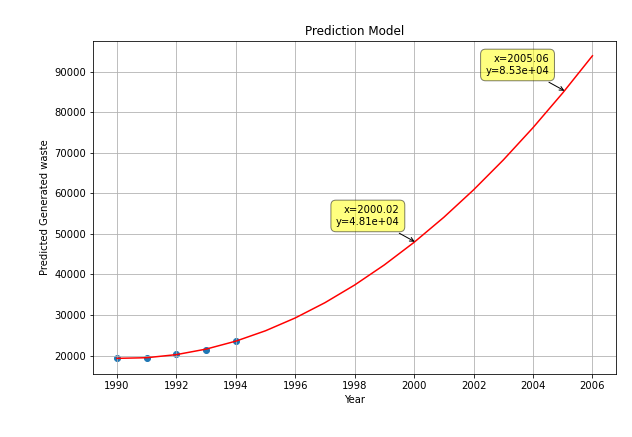

In [43]:
#### for PDF Conversion
Image("Fig2.png")

## 3. Quadratic Regression Problem
>throwing a rubber ball

<ipython-input-44-ccfcf34cfb5d>:14: RuntimeWarning: divide by zero encountered in log10
  Non_Linear_Regression_Problems_x_logscale=np.log10(Non_Linear_Regression_Problems_x)


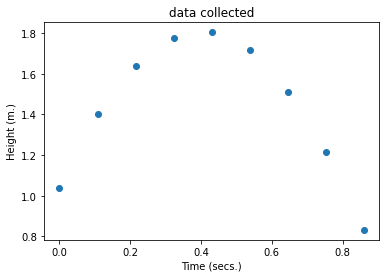

In [44]:
%matplotlib inline
#===============================
#storing and plotting data
#================================


Non_Linear_Regression_Problems_x=np.asarray([0.0000 ,0.1080 ,0.2150 ,0.3225 ,0.4300 ,0.5375 ,0.6450 ,0.7525,0.8600] )# time
Non_Linear_Regression_Problems_y=np.asarray([1.03754, 1.40205, 1.63806, 1.77412, 1.80392, 1.71522, 1.50942, 
                                             1.21410,0.83173]) #  height

X_seq = np.linspace(Non_Linear_Regression_Problems_x.min(),1,20).reshape(-1,1)

avg=np.average(Non_Linear_Regression_Problems_y)
Non_Linear_Regression_Problems_x_logscale=np.log10(Non_Linear_Regression_Problems_x)
Non_Linear_Regression_Problems_y_logscale=np.log10(Non_Linear_Regression_Problems_y)

data_fig = plt.figure()
plt.scatter(Non_Linear_Regression_Problems_x,Non_Linear_Regression_Problems_y);

plt.title("data collected")

plt.xlabel("Time (secs.)")
plt.ylabel("Height (m.)");

### 3.1 Models to Describe the Problem
> Linear Model *Y =aX+intercept*

> Quadratic Model *Y=a$X^{2}$+bX+intercept*

> Cubic Model *Y=a$X^{3}$+b$X^{2}$+cX+intercept*

>Power Model *Y=a($b^{X}$)*

In [45]:
#===========================
#making models
#===========================
Non_Linear_Regression_Problems_lreg = LinearRegression().fit(Non_Linear_Regression_Problems_x.reshape(-1,1), 
                                                             Non_Linear_Regression_Problems_y)


qreg_degree=2
Non_Linear_Regression_Problems_qreg=make_pipeline(PolynomialFeatures(qreg_degree),
                                                  LinearRegression())
Non_Linear_Regression_Problems_qreg.fit(Non_Linear_Regression_Problems_x.reshape(-1,1),
                                        Non_Linear_Regression_Problems_y)


creg_degree=3
Non_Linear_Regression_Problems_creg=make_pipeline(PolynomialFeatures(creg_degree),
                                                  LinearRegression())
Non_Linear_Regression_Problems_creg.fit(Non_Linear_Regression_Problems_x.reshape(-1,1),
                                        Non_Linear_Regression_Problems_y)

#power function
Non_Linear_Regression_Problems_lreg_logscale = LinearRegression().fit(Non_Linear_Regression_Problems_x.reshape(-1,1), 
                                                                      Non_Linear_Regression_Problems_y_logscale)

### 3.2 Weights and intercept values

> Linear Model *Y =-0.2642X+1.5498*

> Quadratic Model *Y= -4.676$X^{2}$+3.758X+1.0449*

> Cubic Model *Y=0.4247$X^{3}$-5.224$X^{2}$+3.9359X+1.03609*

>Power Model *Y=1.5426($0.7907^{X}$)*

In [46]:
#===========================
#evaluation modles wieghts
#===========================
lreg_intercept=Non_Linear_Regression_Problems_lreg.intercept_
lreg_coef=Non_Linear_Regression_Problems_lreg.coef_
qreg_intercept=Non_Linear_Regression_Problems_qreg[1].intercept_
qreg_coef=Non_Linear_Regression_Problems_qreg[1].coef_
creg_intercept=Non_Linear_Regression_Problems_creg[1].intercept_
creg_coef=Non_Linear_Regression_Problems_creg[1].coef_
pfreg_intercept=Non_Linear_Regression_Problems_lreg_logscale.intercept_
pfreg_coef=Non_Linear_Regression_Problems_lreg_logscale.coef_

a=10**pfreg_intercept
b=10**pfreg_coef

print("Lreg Coef= ",lreg_coef)
print("Lreg intercept= ",lreg_intercept)
print("Qreg Coef= ",qreg_coef[1:])
print("Qreg intercept= ",qreg_intercept)
print("Creg Coef= ",creg_coef[1:])
print("Creg intercept= ",creg_intercept)
print("Power Model a= ",a)
print("Power Model b= ",b)

Lreg Coef=  [-0.26422033]
Lreg intercept=  1.5498694214445285
Qreg Coef=  [ 3.75827764 -4.67640316]
Qreg intercept=  1.0449726483249404
Creg Coef=  [ 3.93598527 -5.22436422  0.4247842 ]
Creg intercept=  1.036098099031153
Power Model a=  1.5426018978547942
Power Model b=  [0.79075927]


### 3.3 Finding Score With this Equation
> ${R}^{2} = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}$  

> From The Scores the Quadratic model shows huge advantage over the linear and power, while the cubic model has nearly the same score  

In [47]:
#===========================
#evaluation modles scores
#===========================
lreg_score=Non_Linear_Regression_Problems_lreg.score(Non_Linear_Regression_Problems_x.reshape(-1,1), 
                                                     Non_Linear_Regression_Problems_y)
qreg_score=Non_Linear_Regression_Problems_qreg.score(Non_Linear_Regression_Problems_x.reshape(-1,1),
                                                     Non_Linear_Regression_Problems_y)
creg_score=Non_Linear_Regression_Problems_creg.score(Non_Linear_Regression_Problems_x.reshape(-1,1), 
                                                     Non_Linear_Regression_Problems_y)


y=a*(b**Non_Linear_Regression_Problems_x)
pfreg_score=1-(sum((Non_Linear_Regression_Problems_y-y)**2)/sum((Non_Linear_Regression_Problems_y-avg)**2))

print("lreg score= ",lreg_score)
print("qreg score= ",qreg_score)
print("creg score= ",creg_score)
print("pfeg score= ",pfreg_score)

lreg score=  0.0510280854482692
qreg score=  0.9993073052759994
creg score=  0.9997263473097979
pfeg score=  0.018106856463688592


### 3.4 Plotting the chosen model (Quadratic)

In [48]:
%matplotlib widget
#===========================
# Plotting
#===========================
fig = plt.figure()
ax = fig.subplots()

plt.scatter(Non_Linear_Regression_Problems_x,Non_Linear_Regression_Problems_y)

#ax.plot(Non_Linear_Regression_Problems_x,y,color="black")
lines=ax.plot(X_seq,Non_Linear_Regression_Problems_qreg.predict(X_seq.reshape(-1,1)),color="red")
ax.grid()
ax.set_title("Predicted Model")

ax.set_xlabel("Time (secs.)")
ax.set_ylabel("Predicted Height (m.)")
mplcursors.cursor(lines, hover=False,multiple=True)
fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

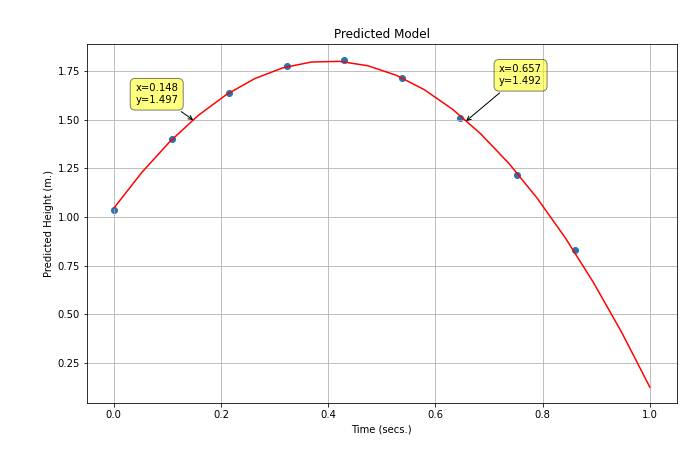

In [49]:
#### for PDF Conversion
Image("Fig3.png")

## 4. Logistic regression Problem
> Effect of Advertising on Sales.

<ipython-input-50-88450f596fa8>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  data_fig.show()


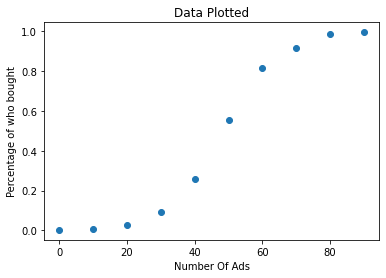

In [50]:
%matplotlib inline
#===============================
#storing and plotting data
#================================


Non_Linear_Regression_Problems_x=np.asarray([0 ,10,20,30,40,50,60,70,80,90] )# time
Non_Linear_Regression_Problems_y=np.asarray([0,0,0,0,0,1,1,1,1,1])
Non_Linear_Regression_Problems_y=np.asarray([.002,.008,.026,.091,.26,.556,.813,.918,.985,.995])
Non_Linear_Regression_Problems_y_true=np.asarray([.002,.008,.026,.091,.26,.556,.813,.918,.985,.995]) #  height

X_seq = np.linspace(Non_Linear_Regression_Problems_x.min(),120,120).reshape(-1,1)

avg=np.average(Non_Linear_Regression_Problems_y)
Non_Linear_Regression_Problems_y_logscale=np.log(Non_Linear_Regression_Problems_y/(1-Non_Linear_Regression_Problems_y))

data_fig = plt.figure()
plt.scatter(Non_Linear_Regression_Problems_x,Non_Linear_Regression_Problems_y_true)
data_fig.show()
plt.title("Data Plotted")

plt.xlabel("Number Of Ads")
plt.ylabel("Percentage of who bought");

### 4.1 Models to Describe the Problem

> Linear Model *Y =aX+intercept*

> Quadratic Model *Y=a$X^{2}$+bX+intercept*

> Cubic Model *Y=a$X^{3}$+b$X^{2}$+cX+intercept*

> Sigmoid Model (Logistic) *Y=$\frac{1}{1+ e^{a+bX}}$*

In [51]:
#===========================
#making models
#===========================
Non_Linear_Regression_Problems_lreg = LinearRegression().fit(Non_Linear_Regression_Problems_x.reshape(-1,1), 
                                                             Non_Linear_Regression_Problems_y)


qreg_degree=2
Non_Linear_Regression_Problems_qreg=make_pipeline(PolynomialFeatures(qreg_degree),LinearRegression())
Non_Linear_Regression_Problems_qreg.fit(Non_Linear_Regression_Problems_x.reshape(-1,1),
                                        Non_Linear_Regression_Problems_y)


creg_degree=3
Non_Linear_Regression_Problems_creg=make_pipeline(PolynomialFeatures(creg_degree),LinearRegression())
Non_Linear_Regression_Problems_creg.fit(Non_Linear_Regression_Problems_x.reshape(-1,1),
                                        Non_Linear_Regression_Problems_y)

Non_Linear_Regression_Problems_sigreg = LinearRegression().fit(Non_Linear_Regression_Problems_x.reshape(-1,1),
                                                               Non_Linear_Regression_Problems_y_logscale)

### 4.2 Weights and intercept of models

> Linear Model *Y =0.01375X -0.1536*

> Quadratic Model *Y=0.00003969$X^{2}$+0.0101X-0.106*

> Cubic Model *Y=-0.000005657$X^{3}$+0.0008034$X^{2}$-0.01589X+ 0.03657*

> Sigmoid Model (Logistic) *Y=$\frac{1}{1+ e^{6.151-0.126X}}$*

In [52]:
#===========================
#evaluation modles wieghts
#===========================
lreg_intercept=Non_Linear_Regression_Problems_lreg.intercept_
lreg_coef=Non_Linear_Regression_Problems_lreg.coef_
qreg_intercept=Non_Linear_Regression_Problems_qreg[1].intercept_
qreg_coef=Non_Linear_Regression_Problems_qreg[1].coef_
creg_intercept=Non_Linear_Regression_Problems_creg[1].intercept_
creg_coef=Non_Linear_Regression_Problems_creg[1].coef_
sigreg2_intercept=Non_Linear_Regression_Problems_sigreg.intercept_
sigreg2_coef=Non_Linear_Regression_Problems_sigreg.coef_

print("Lreg Coef= ",lreg_coef)
print("Lreg intercept= ",lreg_intercept)
print("Qreg Coef= ",qreg_coef[1:])
print("Qreg intercept= ",qreg_intercept)
print("Creg Coef= ",creg_coef[1:])
print("Creg intercept= ",creg_intercept)
print("Sigmodel Model a= ",sigreg2_intercept)
print("Sigmodel Model b= ",sigreg2_coef)

Lreg Coef=  [0.01375636]
Lreg intercept=  -0.15363636363636368
Qreg Coef=  [1.01836364e-02 3.96969697e-05]
Qreg intercept=  -0.1060000000000022
Creg Coef=  [-1.58985043e-02  8.03490676e-04 -5.65773116e-06]
Creg intercept=  0.03657482517527161
Sigmodel Model a=  -6.151540059087443
Sigmodel Model b=  [0.12688819]


### 4.3 Finding Score With this Equation
> ${R}^{2} = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2} $

> the sigmoid model predicts the model most accurately with less parameters than the quadratic model

> also the data is a probability which saturates at 1 and not falling down again like quadratic model.

In [53]:
#===========================
#evaluation modles scores
#===========================
lreg_score=Non_Linear_Regression_Problems_lreg.score(Non_Linear_Regression_Problems_x.reshape(-1,1), 
                                                     Non_Linear_Regression_Problems_y_true)
qreg_score=Non_Linear_Regression_Problems_qreg.score(Non_Linear_Regression_Problems_x.reshape(-1,1), 
                                                     Non_Linear_Regression_Problems_y_true)
creg_score=Non_Linear_Regression_Problems_creg.score(Non_Linear_Regression_Problems_x.reshape(-1,1), 
                                                     Non_Linear_Regression_Problems_y_true)


y_predict_sig=1/(1+np.e**(-Non_Linear_Regression_Problems_sigreg.predict(Non_Linear_Regression_Problems_x.reshape(-1, 1))))
sigreg_score=1-(sum((
    Non_Linear_Regression_Problems_y-y_predict_sig)**2)/sum((
    Non_Linear_Regression_Problems_y-np.average(Non_Linear_Regression_Problems_y))**2))

print("lreg score= ",lreg_score)
print("qreg score= ",qreg_score)
print("creg score= ",creg_score)
print("logreg score= ",sigreg_score)

lreg score=  0.927231494203538
qreg score=  0.9321731849665623
creg score=  0.9908952518579797
logreg score=  0.9996721097062489


> Predict with all models @ 100

In [54]:
#test modles 
#===========================

print("linear model predict @ 100 =",Non_Linear_Regression_Problems_lreg.predict(np.array([100]).reshape(-1,1)))
print("quad model predict @ 100 =",Non_Linear_Regression_Problems_qreg.predict(np.array([100]).reshape(-1,1)))
print("cubic model predict @ 100 =",Non_Linear_Regression_Problems_creg.predict(np.array([100]).reshape(-1,1)))
print("logestic model predict @ 100 =",1/(1+(np.e**(-Non_Linear_Regression_Problems_sigreg.predict(
                                                        np.array([100]).reshape(-1,1))))))

linear model predict @ 100 = [1.222]
quad model predict @ 100 = [1.30933333]
cubic model predict @ 100 = [0.8239]
logestic model predict @ 100 = [0.99855367]


### 4.4 Plotting the chosen model (Sigmoid)

In [55]:
%matplotlib widget
fig = plt.figure()
ax = fig.subplots()

plt.scatter(Non_Linear_Regression_Problems_x,Non_Linear_Regression_Problems_y_true)

#ax.plot(Non_Linear_Regression_Problems_x,y,color="black")
lines=ax.plot(X_seq,1/(1+(np.e**(-Non_Linear_Regression_Problems_sigreg.predict(X_seq.reshape(-1,1))))),color="red")

ax.grid()
ax.set_title("Prediction model")

ax.set_xlabel("Number Of Labels")
ax.set_ylabel("Predicted probability of buying")
mplcursors.cursor(lines, hover=False,multiple=True)
fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

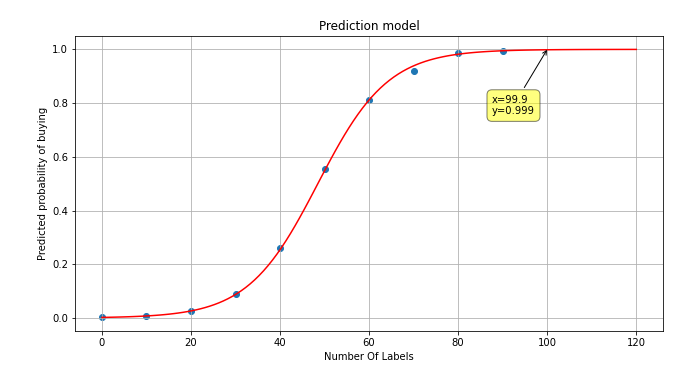

In [56]:
#### for PDF Conversion
Image("Fig4.png")

### Hand Analysis with Excel sheet.

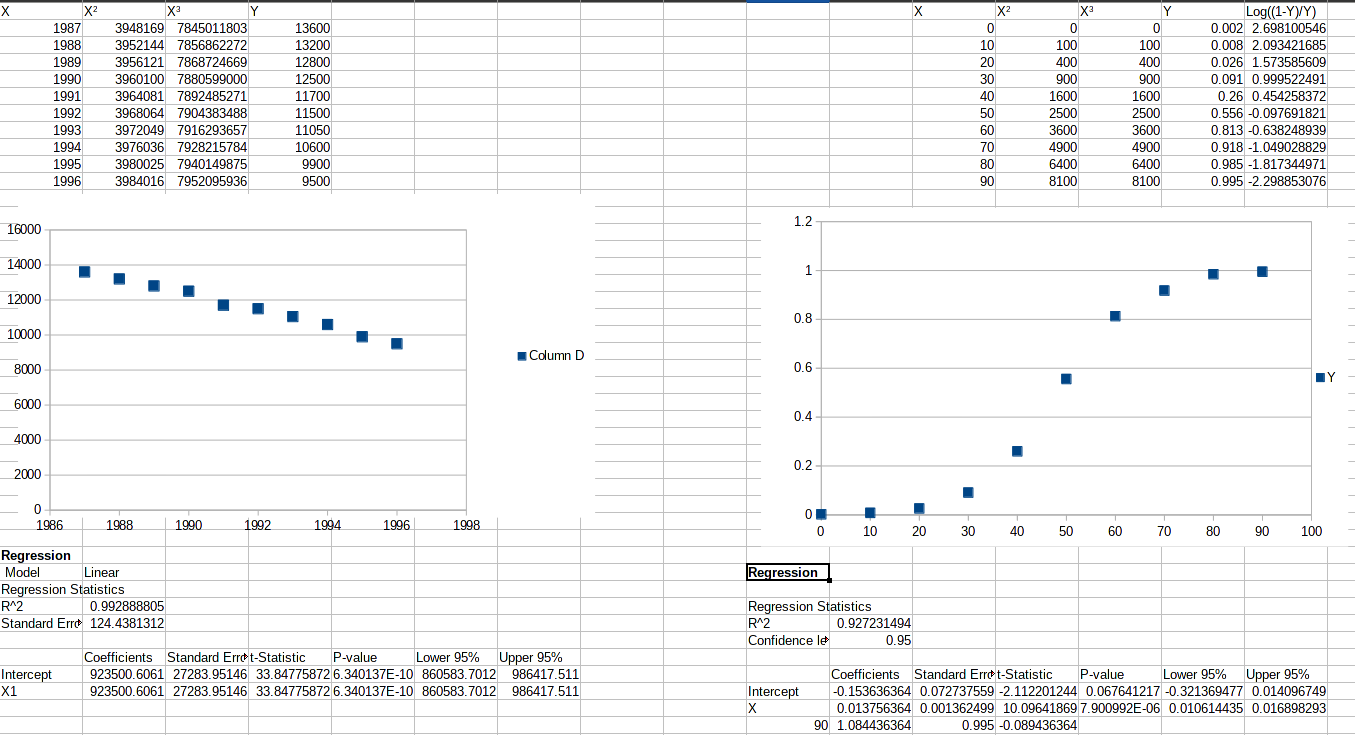

In [59]:
Image("Fig5.png")

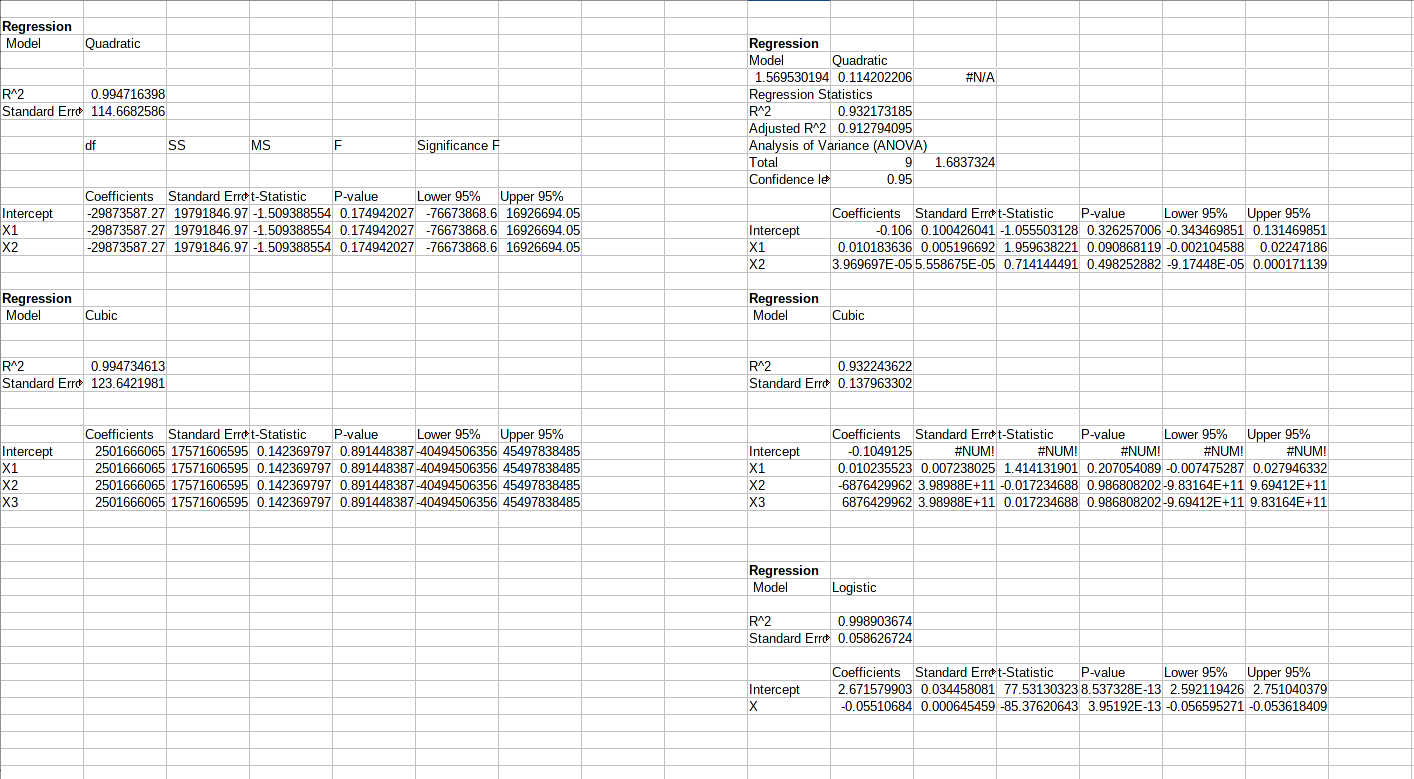

In [60]:
Image("Fig6.png")